# Speed Dating Dataset

This data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

There are 122 columns(independent variables) in the dataset, match column(dependent variable) needs to be predicted.

In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dating = pd.read_csv('speeddating.csv')
dating.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


## Columns description

Variable: Description

gender: Gender of self

age: Age of self

age_o: Age of partner

d_age: Difference in age

d_age: Difference in age

race: Race of self

race_o: Race of partner

samerace: Whether the two persons have the same race or not.

importance_same_race: How important is it that partner is of same race?

importance_same_religion: How important is it that partner has same religion?

field: Field of study

pref_o_attractive: How important does partner rate attractiveness

pref_o_sinsere: How important does partner rate sincerity

pref_o_intelligence: How important does partner rate intelligence

pref_o_funny: How important does partner rate being funny

pref_o_ambitious: How important does partner rate ambition

pref_o_shared_interests: How important does partner rate having shared interests

attractive_o: Rating by partner (about me) at night of event on attractiveness

sincere_o: Rating by partner (about me) at night of event on sincerity

intelligence_o: Rating by partner (about me) at night of event on intelligence

funny_o: Rating by partner (about me) at night of event on being funny

ambitous_o: Rating by partner (about me) at night of event on being ambitious

shared_interests_o: Rating by partner (about me) at night of event on shared interest

attractive_important: What do you look for in a partner - attractiveness

sincere_important: What do you look for in a partner - sincerity

intellicence_important: What do you look for in a partner - intelligence

funny_important: What do you look for in a partner - being funny

ambtition_important: What do you look for in a partner - ambition

shared_interests_important: What do you look for in a partner - shared interests

attractive: Rate yourself - attractiveness

sincere: Rate yourself - sincerity

intelligence: Rate yourself - intelligence

funny: Rate yourself - being funny

ambition: Rate yourself - ambition

attractive_partner: Rate your partner - attractiveness

sincere_partner: Rate your partner - sincerity

intelligence_partner: Rate your partner - intelligence

funny_partner: Rate your partner - being funny

ambition_partner: Rate your partner - ambition

shared_interests_partner: Rate your partner - shared interests

sports: Your own interests [1-10]

interests_correlate: Correlation between participant’s and partner’s ratings of interests.

expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating 
event?

expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?

expected_num_matches: How many matches do you expect to get?

like: Did you like your partner?

guess_prob_liked: How likely do you think it is that your partner likes you?

met: Have you met your partner before?

decision: Decision at night of event.

decision_o: Decision of partner at night of event.

match: Match (yes/no)

## Data Cleaning

In [3]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), object(64)
memory usage: 7.9+ MB


In [4]:
dating.shape

(8378, 123)

In [5]:
#data types in the features
dating.dtypes.value_counts()

object     64
float64    59
dtype: int64

In [6]:
#looking for columns with unique values
dating.nunique().sort_values()

has_null                        1
decision                        2
decision_o                      2
samerace                        2
match                           2
                             ... 
shared_interests_important     85
attractive_important           94
pref_o_attractive              94
interests_correlate           155
field                         260
Length: 123, dtype: int64

In [7]:
#drop the column has_null because it has only one value for all the rows
dating.drop(['has_null'], axis = 1, inplace= True)

In [8]:
#create a function that removes all the unwanted characters b', ''
def remove_characters(feature):
    return feature.replace("b'",'').replace("'","")

#select string columns
string_dataset = dating.select_dtypes(include = ['object'])

#remove the characters
for feature in string_dataset.columns:
    dating[feature] = dating[feature].apply(lambda x: remove_characters(x))

In [9]:
#the columns with the prefix d_ are the values of other columns but binned
to_drop = [column_name for column_name in dating.columns if column_name.startswith('d_')]
dating.drop(to_drop, axis = 1, inplace = True)

In [10]:
dating.shape

(8378, 66)

In [11]:
#decision and decision_o at night event are basically the same as match, match it is calculated from them
dating.drop(['decision', 'decision_o'], axis = 1, inplace= True)

In [12]:
dating.head()

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,1.0,female,21.0,27.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
1,1.0,female,21.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
2,1.0,female,21.0,22.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,Law,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1
3,1.0,female,21.0,23.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,Law,...,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1
4,1.0,female,21.0,24.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,Law,...,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1


In [13]:
missing_columns = dating.isnull().sum().sort_values()

In [14]:
#drop the columns that have more than the 5% of missing values
dating.drop(['expected_num_interested_in_me', 'expected_num_matches', 'shared_interests_o',
             'shared_interests_partner', 'ambitous_o', 'ambition_partner'], axis = 1, inplace= True)

In [15]:
#There's to columns of age, from self and o, we can get just one age column from diff = self - o
dating['age_diff'] = dating['age'] - dating['age_o']
dating.drop(['age','age_o'], axis = 1, inplace = True)

In [16]:
#if they had met the partner before, yes or no (1 or 0)
dating['met'].value_counts()

0.0    7644
1.0     351
7.0       3
5.0       2
3.0       1
8.0       1
6.0       1
Name: met, dtype: int64

In [17]:
#I change the few different values for the mode that is 0
for number in [3.0, 5.0, 6.0, 7.0, 8.0]:
    dating['met'].replace(number,0, inplace =True)

In [18]:
dating['met'].value_counts()

0.0    7652
1.0     351
Name: met, dtype: int64

In [19]:
#field has many different categorical values, when I convert this column into a numeric one, it sums more than 200 columns
dating.drop(['field'], axis = 1, inplace = True)

In [20]:
dating.shape

(8378, 56)

In [21]:
dating.head()

,wave,gender,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,match,age_diff
0,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,35.0,20.0,20.0,...,9.0,8.0,1.0,0.14,3.0,7.0,6.0,0.0,0,-6.0
1,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,60.0,0.0,0.0,...,9.0,8.0,1.0,0.54,3.0,7.0,5.0,1.0,0,-1.0
2,1.0,female,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,19.0,18.0,19.0,...,9.0,8.0,1.0,0.16,3.0,7.0,NaN,1.0,1,-1.0
3,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,30.0,5.0,15.0,...,9.0,8.0,1.0,0.61,3.0,7.0,6.0,0.0,1,-2.0
4,1.0,female,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,30.0,10.0,20.0,...,9.0,8.0,1.0,0.21,3.0,6.0,6.0,0.0,1,-3.0


In [22]:
missing_rows=dating.isnull().sum(axis = 1)
missing_rows.value_counts()

0     7079
1      627
2      143
11     119
3       85
4       61
7       58
8       54
33      48
5       37
32      15
6        8
34       6
19       5
9        5
13       5
12       5
44       5
10       4
15       3
37       2
18       1
43       1
39       1
40       1
dtype: int64

In [23]:
dating_clean = dating.dropna()  #drop 15% of the rows

In [24]:
dating_clean.shape

(7079, 56)

In [25]:
dating_clean.isnull().sum().sum()

0

In [26]:
dating.head()

,wave,gender,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,match,age_diff
0,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,35.0,20.0,20.0,...,9.0,8.0,1.0,0.14,3.0,7.0,6.0,0.0,0,-6.0
1,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,60.0,0.0,0.0,...,9.0,8.0,1.0,0.54,3.0,7.0,5.0,1.0,0,-1.0
2,1.0,female,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,19.0,18.0,19.0,...,9.0,8.0,1.0,0.16,3.0,7.0,NaN,1.0,1,-1.0
3,1.0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,30.0,5.0,15.0,...,9.0,8.0,1.0,0.61,3.0,7.0,6.0,0.0,1,-2.0
4,1.0,female,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2.0,4.0,30.0,10.0,20.0,...,9.0,8.0,1.0,0.21,3.0,6.0,6.0,0.0,1,-3.0


In [27]:
#numeric columns
columns_numeric = dating_clean.select_dtypes(include = ['int','float']).columns.tolist()

#categorical columns
columns_category = dating_clean.select_dtypes(include = ['object']).drop('match', axis=1).columns

In [28]:
dating_clean[columns_category]

,gender,race,race_o,samerace
0,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
1,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
3,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
4,female,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0
5,female,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0
...,...,...,...,...
8372,male,European/Caucasian-American,European/Caucasian-American,1
8373,male,European/Caucasian-American,Latino/Hispanic American,0
8374,male,European/Caucasian-American,Other,0
8376,male,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0


In [29]:
dating_clean[columns_numeric]

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,age_diff
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,10.0,9.0,8.0,1.0,0.14,3.0,7.0,6.0,0.0,-6.0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,10.0,9.0,8.0,1.0,0.54,3.0,7.0,5.0,1.0,-1.0
3,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,10.0,9.0,8.0,1.0,0.61,3.0,7.0,6.0,0.0,-2.0
4,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,10.0,9.0,8.0,1.0,0.21,3.0,6.0,6.0,0.0,-3.0
5,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,10.0,9.0,8.0,1.0,0.25,3.0,6.0,5.0,0.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,21.0,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,...,10.0,10.0,7.0,3.0,0.28,10.0,4.0,4.0,0.0,1.0
8373,21.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,...,10.0,10.0,7.0,3.0,0.64,10.0,2.0,5.0,0.0,-1.0
8374,21.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,...,10.0,10.0,7.0,3.0,0.71,10.0,4.0,4.0,0.0,1.0
8376,21.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,...,10.0,10.0,7.0,3.0,0.62,10.0,5.0,5.0,0.0,3.0


In [30]:
#use get dummies to convert categorical attributes into numericals
dating_ready = pd.get_dummies(data=dating_clean, columns=['gender', 'race', 'race_o', 'samerace', 'match'],drop_first=True)

In [31]:
dating_ready.shape

(7079, 62)

In [32]:
dating_ready.isnull().sum().sum()

0

In [33]:
dating_ready.dtypes.value_counts()

float64    51
uint8      11
dtype: int64

In [34]:
dating_ready.describe()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_Black/African American,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,match_1
count,7079.000000,7079.000000,7079.00000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,...,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000,7079.00000,7079.000000
mean,11.299336,3.782738,3.65772,22.232585,17.444366,20.304576,17.490668,10.723546,11.848880,6.209549,...,0.047606,0.563921,0.077977,0.067382,0.048736,0.560107,0.080096,0.065970,0.40048,0.174318
std,5.957994,2.832566,2.81831,12.372573,6.932509,6.831764,6.092708,6.107862,6.348855,1.939503,...,0.212945,0.495932,0.268155,0.250701,0.215330,0.496409,0.271461,0.248247,0.49003,0.379410
min,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.000000,1.000000,1.00000,15.000000,15.000000,17.500000,15.000000,5.000000,9.520000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,11.000000,3.000000,3.00000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,15.000000,6.000000,6.00000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
max,21.000000,10.000000,10.00000,100.000000,47.000000,50.000000,50.000000,53.000000,30.000000,10.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [35]:
dating_ready.columns

Index(['wave', 'importance_same_race', 'importance_same_religion',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga',
       'interests_correlate', 'expected_happy_with_sd_people', 'like',
       'guess_prob_liked', 'met', 'age_diff', 'gender_male',
       'race_Black/African American', 'race_European/Caucasian-American',
       'race_L

## Logistic Regression and Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
#choose attributes to make the regression and the target
y = dating_ready[['match_1']]
X = dating_ready.drop(['match_1'], axis = 1) #all the attributes
X1 = X[['like', 'met']] 
X2 = X[['shopping', 'concerts', 'clubbing']]
X3 = X[['sports', 'tvsports', 'hiking', 'exercise']]

In [59]:
y.shape

(7079, 1)

In [60]:
X.shape

(7079, 63)

In [61]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,Kmeans_Clusters,MATCH
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,1,0,0,0,1,0
3,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,1,0,0,0,1,1
4,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,1,0,0,1,1
5,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,1,0,0,0,1,0


In [62]:
from imblearn.over_sampling import RandomOverSampler

#aplicar el sobremuestreo aleatorio a la clase minoritariaros = RandomOverSampler()
ros = RandomOverSampler()

X1, y1 = ros.fit_resample(X1, y)
X2, y2 = ros.fit_resample(X2, y)
X3, y3 = ros.fit_resample(X3, y)
X, y = ros.fit_resample(X, y)

In [63]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,Kmeans_Clusters,MATCH
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,1,0,0,0,1,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,1,0,0,0,1,1
3,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,1,0,0,1,1
4,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,1,0,0,0,1,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

In [43]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X = log_reg.fit(X_train, y_train)
test_X = log_reg.score(X_test, y_test)

result_X = cross_val_score(log_reg, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 0.7684630738522954
Cross validation X:  [0.76786805 0.75626145 0.74648748 0.78239609 0.78789731]
Mean X:  0.7681820761635348


In [44]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X1 = log_reg.fit(X1_train, y1_train)
test_X1 = log_reg.score(X1_test, y1_test)

result_X1 = cross_val_score(log_reg, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

Test X1: 0.682919874536641
Cross validation X1:  [0.67562615 0.69395235 0.67562615 0.70415648 0.71515892]
Mean X1:  0.6929040092123914


In [45]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X2 = log_reg.fit(X2_train, y2_train)
test_X2 = log_reg.score(X2_test, y2_test)

result_X2 = cross_val_score(log_reg, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

Test X2: 0.5155403478756773
Cross validation X2:  [0.53451436 0.53329261 0.52351863 0.52872861 0.54584352]
Mean X2:  0.5331795445482149


In [46]:
#all the attributes, cv = 5 means we split the data en 5 folds
log_reg = LogisticRegression(random_state=0)

training_X3 = log_reg.fit(X3_train, y3_train)
test_X3 = log_reg.score(X3_test, y3_test)

result_X3 = cross_val_score(log_reg, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Test X3: 0.5175363558597091
Cross validation X3:  [0.49786194 0.526573   0.49602932 0.51528117 0.50244499]
Mean X3:  0.5076380850533133


## Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X = tree.fit(X_train, y_train)
test_X = tree.score(X_test, y_test)

result_X = cross_val_score(tree, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 0.9056173367550613
Cross validation X:  [0.89859499 0.89065363 0.87782529 0.88325183 0.89547677]
Mean X:  0.8891605044112836


In [48]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X1 = tree.fit(X1_train, y1_train)
test_X1 = tree.score(X1_test, y1_test)

result_X1 = cross_val_score(tree, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

Test X1: 0.6849158825206729
Cross validation X1:  [0.67929139 0.69334148 0.67562615 0.70537897 0.71577017]
Mean X1:  0.6938816309278257


In [49]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X2 = tree.fit(X2_train, y2_train)
test_X2 = tree.score(X2_test, y2_test)

result_X2 = cross_val_score(tree, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

Test X2: 0.6621043627031651
Cross validation X2:  [0.65852169 0.67379352 0.64263897 0.63691932 0.64853301]
Mean X2:  0.6520813014444397


In [50]:
#all the attributes, cv = 5 means we split the data en 5 folds
tree = DecisionTreeClassifier(random_state=0)

training_X3 = tree.fit(X3_train, y3_train)
test_X3 = tree.score(X3_test, y3_test)

result_X3 = cross_val_score(tree, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Test X3: 0.6746506986027944
Cross validation X3:  [0.65485644 0.67073916 0.66218693 0.6601467  0.68337408]
Mean X3:  0.6662606622825163


Look for the hyperparameters of the decision tree: criterion, min_samples_leaf, max_depth and random_state.

In [51]:

searching_X = GridSearchCV(tree, parameters, cv=5)
searching_X.fit(X_train, y_train)

searching_X1 = GridSearchCV(tree, parameters, cv=5)
searching_X1.fit(X1_train, y1_train)

searching_X2 = GridSearchCV(tree, parameters, cv=5)
searching_X2.fit(X2_train, y2_train)

searching_X3 = GridSearchCV(tree, parameters, cv=5)
searching_X3.fit(X3_train, y3_train)

from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 50, 100, 150, 200],
              'max_depth': [2, 4, 6, 8, 10, 12], 'random_state': [0, 10, 42]}

tree = DecisionTreeClassifier()

print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

print("Best parameters for X1: ", searching_X1.best_params_)
print("Mean for X1: ", searching_X1.best_score_)

print("Best parameters for X2: ", searching_X2.best_params_)
print("Mean for X2: ", searching_X2.best_score_)

print("Best parameters for X3: ", searching_X3.best_params_)
print("Mean for X3: ", searching_X3.best_score_)

Best parameters for X:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5, 'random_state': 0}
Mean for X:  0.8273274058186825
Best parameters for X1:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'random_state': 0}
Mean for X1:  0.6937593815390727
Best parameters for X2:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5, 'random_state': 0}
Mean for X2:  0.6420611082650145
Best parameters for X3:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5, 'random_state': 0}
Mean for X3:  0.6392551972792976


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

#all the attributes, cv = 5 means we split the data en 5 folds
forest = RandomForestClassifier(random_state=0)

training_X = forest.fit(X_train, y_train)
test_X = forest.score(X_test, y_test)

result_X = cross_val_score(forest, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 0.9572284003421728
Cross validation X:  [0.9492975  0.94013439 0.91875382 0.94315403 0.94376528]
Mean X:  0.9390210041924746


In [53]:
forest = RandomForestClassifier(random_state=0)

training_X1 = forest.fit(X1_train, y1_train)
test_X1 = forest.score(X1_test, y1_test)

result_X1 = cross_val_score(forest, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

Test X1: 0.6849158825206729
Cross validation X1:  [0.67868051 0.69334148 0.67562615 0.70476773 0.71638142]
Mean X1:  0.6937594562179907


In [54]:
forest = RandomForestClassifier(random_state=0)

training_X2 = forest.fit(X2_train, y2_train)
test_X2 = forest.score(X2_test, y2_test)

result_X2 = cross_val_score(forest, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

Test X2: 0.6626746506986028
Cross validation X2:  [0.65058033 0.67318265 0.64080635 0.63508557 0.65158924]
Mean X2:  0.6502488301547498


In [55]:
forest = RandomForestClassifier(random_state=0)

training_X3 = forest.fit(X3_train, y3_train)
test_X3 = forest.score(X3_test, y3_test)

result_X3 = cross_val_score(forest, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Test X3: 0.675506130595951
Cross validation X3:  [0.6536347  0.67257178 0.6652413  0.66136919 0.68154034]
Mean X3:  0.6668714611527736


Look for some of the hyperparameters of the random forest: n_estimators, min_samples_leaf, max_features.

In [56]:
parameters = {'min_samples_leaf': [5, 10, 50, 100, 150, 200], 
              'n_estimators': [50, 100, 150, 200], 'max_features': ['sqrt', 'log2']}

forest = RandomForestClassifier(random_state=0)

searching_X = GridSearchCV(forest, parameters, cv=5)
searching_X.fit(X_train, y_train)
searching_X1= GridSearchCV(forest, parameters, cv=5)
searching_X1.fit(X1_train, y1_train)
searching_X2 = GridSearchCV(forest, parameters, cv=5)
searching_X2.fit(X2_train, y_train)
searching_X3 = GridSearchCV(forest, parameters, cv=5)
searching_X3.fit(X3_train, y_train)

print("Best parameters for X: ", searching_X.best_params_)
print("Mean for X: ", searching_X.best_score_)

print("Best parameters for X1: ", searching_X1.best_params_)
print("Mean for X1: ", searching_X1.best_score_)

print("Best parameters for X2: ", searching_X2.best_params_)
print("Mean for X2: ", searching_X2.best_score_)

print("Best parameters for X3: ", searching_X3.best_params_)
print("Mean for X3: ", searching_X3.best_score_)

Best parameters for X:  {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150}
Mean for X:  0.8994272873779187
Best parameters for X1:  {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 50}
Mean for X1:  0.6937593815390727
Best parameters for X2:  {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
Mean for X2:  0.6470710928363501
Best parameters for X3:  {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150}
Mean for X3:  0.6641834681785663


## SVM

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

polynomial = SVC(kernel='poly', random_state = 0)

training_X = polynomial.fit(X_train,y_train)
test_X = polynomial.score(X_test, y_test)

result_X = cross_val_score(polynomial, X_train, y_train, cv = 5)

print("Test X:" , test_X)
print("Cross validation X: ",result_X)
print("Mean X: ",result_X.mean())

Test X: 0.8003992015968064
Cross validation X:  [0.81368357 0.79657911 0.78924863 0.80684597 0.799511  ]
Mean X:  0.8011736538751638


In [58]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X1 = polynomial.fit(X1_train,y1_train)
test_X1 = polynomial.score(X1_test, y1_test)

result_X1 = cross_val_score(polynomial, X1_train, y1_train, cv = 5)

print("Test X1:" , test_X1)
print("Cross validation X1: ",result_X1)
print("Mean X1: ",result_X1.mean())

Test X1: 0.6812090105503279
Cross validation X1:  [0.6744044  0.69395235 0.67501527 0.70354523 0.71210269]
Mean X1:  0.6918039887503677


In [59]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X2 = polynomial.fit(X2_train,y2_train)
test_X2 = polynomial.score(X2_test, y2_test)

result_X2 = cross_val_score(polynomial, X2_train, y2_train, cv = 5)

print("Test X2:" , test_X2)
print("Cross validation X2: ",result_X2)
print("Mean X2: ",result_X2.mean())

Test X2: 0.5446250356429997
Cross validation X2:  [0.55528406 0.56017104 0.52229688 0.53545232 0.54462103]
Mean X2:  0.5435650669944574


In [60]:
polynomial = SVC(kernel='poly', random_state = 0)

training_X3 = polynomial.fit(X3_train,y3_train)
test_X3 = polynomial.score(X3_test, y3_test)

result_X3 = cross_val_score(polynomial, X3_train, y3_train, cv = 5)

print("Test X3:" , test_X3)
print("Cross validation X3: ",result_X3)
print("Mean X3: ",result_X3.mean())

Test X3: 0.5289421157684631
Cross validation X3:  [0.52840562 0.53634698 0.53145999 0.52444988 0.52628362]
Mean X3:  0.5293892160655262


Look for the hyperparameters of the polynomial kernel: $\gamma$, $r$ and $d$.

In [61]:
# parameters = {'degree': [2, 3, 4],
#               'gamma': [0.1, 1, 10],
#               'coef0': [0, 1, 2]}

# polynomial = SVC(kernel='poly', random_state = 0)

# searching_X = GridSearchCV(polynomial, parameters, cv=5)
# searching_X.fit(X_train, y_train)

# print("Best parameters for X: ", searching_X.best_params_)
# print("Mean for X: ", searching_X.best_score_)

# y_predicted = searching_X.predict(X_test)
# accuracy = accuracy_score(y_test, y_predicted)

## All the results

In [65]:
# X = dating_ready.drop(['match_1'], axis = 1) #all the attributes
# X1 = X[['like', 'met']] 
# X2 = X[['shopping', 'concerts', 'clubbing']]
# X3 = X[['sports', 'tvsports', 'hiking', 'exercise']]

from tabulate import tabulate 
#create data
data = [["X", 0.770, 0.772, 0.909, 0.889, 0.829, 0.956, 0.938, 0.898, 0.795, 0.805],
        ["X1", 0.681, 0.694, 0.681, 0.695, 0.695, 0.681, 0.695, 0.695, 0.677, 0.692],
        ["X2", 0.530, 0.536, 0.651, 0.643, 0.635, 0.650, 0.644, 0.645, 0.545, 0.548],
        ["X3", 0.514, 0.509, 0.679, 0.664, 0.640, 0.674, 0.664, 0.666, 0.522, 0.519]
        ]
  
#define header names
col_names = ["Features", "Log Reg", "Log Reg CV", "Dec Tree", "Dec Tree CV", "Dec Tree Hyp",
             "Rand Forest", "Rand Forest CV", "Rand Forest Hyp", "Poly", "Poly CV"]
  

In [66]:
import pandas as pd
resume = pd.DataFrame(data, columns=["Features", "Log Reg", "Log Reg CV", "Dec Tree", "Dec Tree CV", "Dec Tree Hyp",
             "Rand Forest", "Rand Forest CV", "Rand Forest Hyp", "Poly", "Poly CV"])

In [67]:
resume.head()

,Features,Log Reg,Log Reg CV,Dec Tree,Dec Tree CV,Dec Tree Hyp,Rand Forest,Rand Forest CV,Rand Forest Hyp,Poly,Poly CV
0,X,0.770,0.772,0.909,0.889,0.829,0.956,0.938,0.898,0.795,0.805
1,X1,0.681,0.694,0.681,0.695,0.695,0.681,0.695,0.695,0.677,0.692
2,X2,0.530,0.536,0.651,0.643,0.635,0.650,0.644,0.645,0.545,0.548
3,X3,0.514,0.509,0.679,0.664,0.640,0.674,0.664,0.666,0.522,0.519


# Clustering

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

In [69]:
# X = dating_ready.drop(['match_1'], axis = 1) #all the attributes
X_norm = StandardScaler().fit_transform(X) #use X, the balanced dataset

In [70]:
X_norm.shape

(11690, 63)

In [71]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

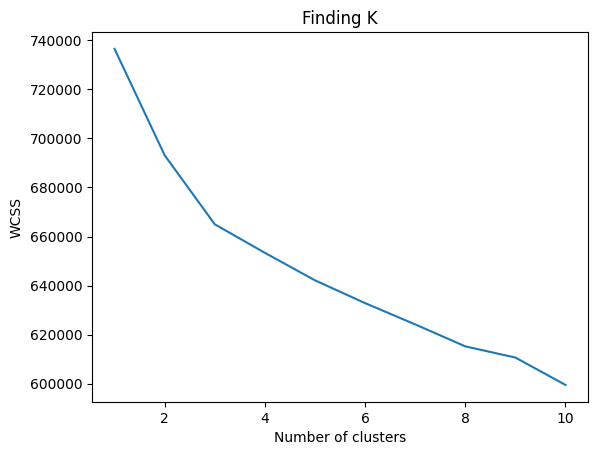

In [72]:
plt.plot(range(1,11),wcss)
plt.title('Finding K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph K=3

In [73]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(X_norm)

KMeans(n_clusters=3)

In [74]:
X['Kmeans_Clusters'] = clustering.labels_

In [75]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,Kmeans_Clusters,MATCH
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,1,0,0,0,2,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,1,0,0,0,2,0
2,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,1,0,0,0,2,1
3,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,1,0,0,2,1
4,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
X.shape

(11690, 63)

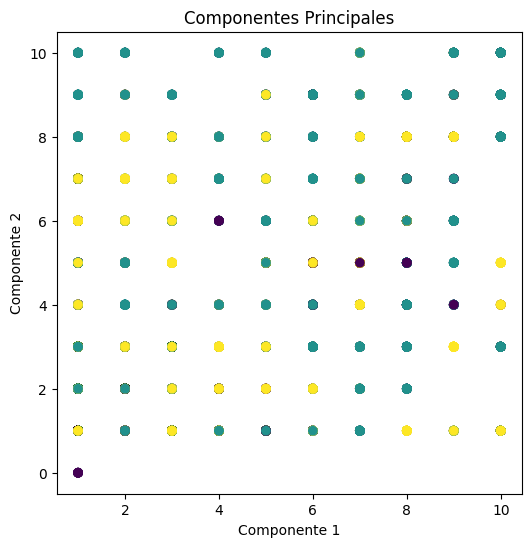

In [77]:
import numpy as np
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot (1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title("Componentes Principales")

# color_theme = np.array(["blue", "green", "orange"]) 
ax.scatter (x = X['importance_same_religion'], y = X['importance_same_race'],
c=X['Kmeans_Clusters'])

plt.show()

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_dating = pca.fit_transform(X_norm) 
pca_result = pd.DataFrame (data=pca_dating, columns=['Componente_1', 'Componente_2']) 

pca_result_clusters = pd.concat([pca_result, X[['Kmeans_Clusters']]], axis=1)

In [79]:
pca_result_clusters.head()

,Componente_1,Componente_2,Kmeans_Clusters
0,0.876944,0.274413,2
1,-0.268322,0.346271,2
2,0.216114,0.691571,2
3,1.518323,0.380873,2
4,1.692165,-0.634916,0


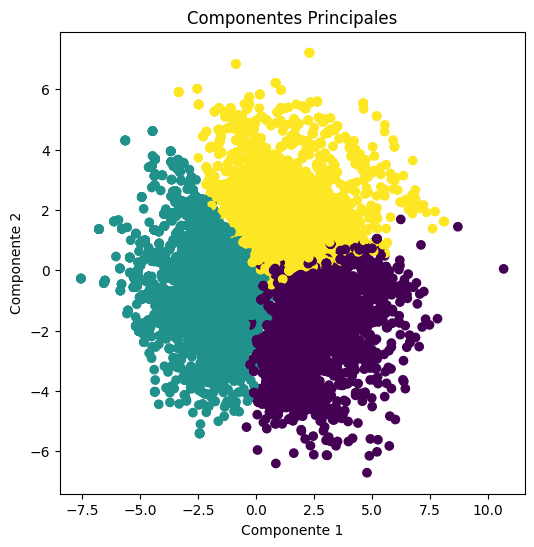

In [80]:
import numpy as np
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot (1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title("Componentes Principales")

# color_theme = np.array(["blue", "green", "orange"]) 
ax.scatter (x = pca_result_clusters['Componente_1'], y = pca_result_clusters['Componente_2'],
c=pca_result_clusters['Kmeans_Clusters'])

plt.show()

## Clusters

In [81]:
X['MATCH'] = y

In [82]:
X.head()

,wave,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,...,race_European/Caucasian-American,race_Latino/Hispanic American,race_Other,race_o_Black/African American,race_o_European/Caucasian-American,race_o_Latino/Hispanic American,race_o_Other,samerace_1,Kmeans_Clusters,MATCH
0,1.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,0,0,0,0,1,0,0,0,2,0
1,1.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,0,0,0,0,1,0,0,0,2,0
2,1.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,0,0,0,0,1,0,0,0,2,1
3,1.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,0,0,0,0,0,1,0,0,2,1
4,1.0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
#filtrar el dataset de acuerdo al cluster asignado
cluster0 = X.loc[X['Kmeans_Clusters']==0]
cluster1 = X.loc[X['Kmeans_Clusters']==1]
cluster2 = X.loc[X['Kmeans_Clusters']==2]

In [84]:
cluster0['gender_male'].value_counts()

0    1659
1    1087
Name: gender_male, dtype: int64

In [85]:
cluster1['gender_male'].value_counts()

0    3517
1    1456
Name: gender_male, dtype: int64

In [86]:
cluster2['gender_male'].value_counts()

1    3273
0     698
Name: gender_male, dtype: int64

In [87]:
cluster0['MATCH'].value_counts()

0    2191
1     555
Name: MATCH, dtype: int64

In [88]:
cluster1['MATCH'].value_counts()

1    3088
0    1885
Name: MATCH, dtype: int64

In [89]:
cluster2['MATCH'].value_counts()

1    2202
0    1769
Name: MATCH, dtype: int64

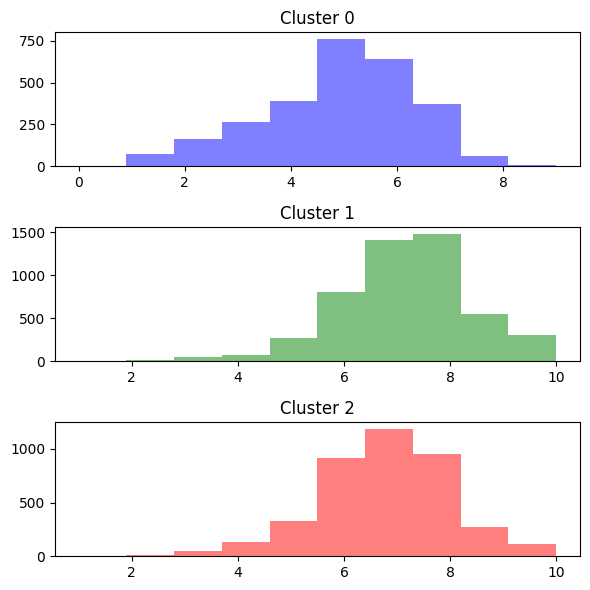

In [90]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6,6))

axs[0].hist(cluster0['like'], bins=10, color='blue', alpha=0.5)
axs[0].set_title('Cluster 0')
axs[1].hist(cluster1['like'], bins=10, color='green', alpha=0.5)
axs[1].set_title('Cluster 1')
axs[2].hist(cluster2['like'], bins=10, color='red', alpha=0.5)
axs[2].set_title('Cluster 2')

fig.tight_layout()
plt.show()

In [91]:
cluster0['like'].describe()

count    2746.000000
mean        4.955754
std         1.602295
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: like, dtype: float64

In [92]:
cluster1['like'].describe()

count    4973.000000
mean        7.327307
std         1.396901
min         1.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: like, dtype: float64

In [93]:
cluster2['like'].describe()

count    3971.000000
mean        6.887686
std         1.406212
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: like, dtype: float64

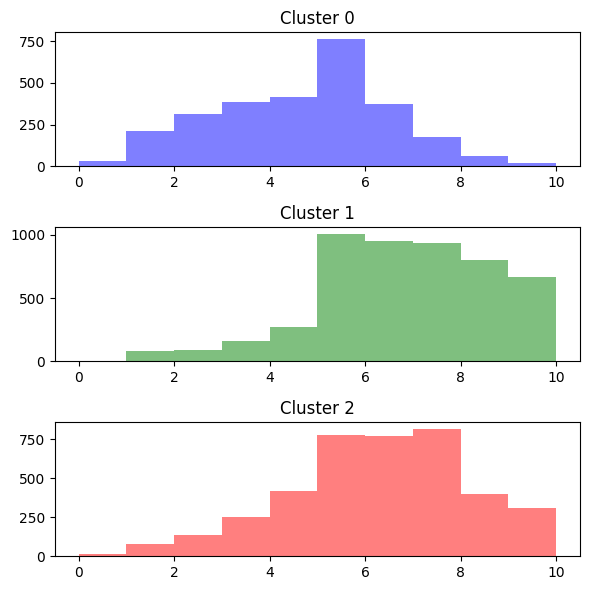

In [94]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6,6))

axs[0].hist(cluster0['guess_prob_liked'], bins=10, color='blue', alpha=0.5)
axs[0].set_title('Cluster 0')
axs[1].hist(cluster1['guess_prob_liked'], bins=10, color='green', alpha=0.5)
axs[1].set_title('Cluster 1')
axs[2].hist(cluster2['guess_prob_liked'], bins=10, color='red', alpha=0.5)
axs[2].set_title('Cluster 2')

fig.tight_layout()
plt.show()

In [95]:
cluster0['guess_prob_liked'].describe()

count    2746.000000
mean        4.220867
std         1.841763
min         0.000000
25%         3.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: guess_prob_liked, dtype: float64

In [96]:
cluster1['guess_prob_liked'].describe()

count    4973.000000
mean        6.414337
std         1.931032
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: guess_prob_liked, dtype: float64

In [97]:
cluster2['guess_prob_liked'].describe()

count    3971.000000
mean        5.826366
std         1.965927
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: guess_prob_liked, dtype: float64

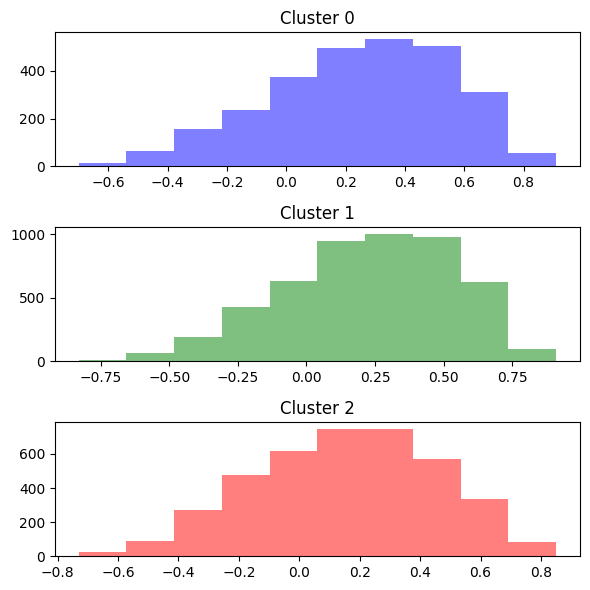

In [101]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6,6))

axs[0].hist(cluster0['interests_correlate'], bins=10, color='blue', alpha=0.5)
axs[0].set_title('Cluster 0')
axs[1].hist(cluster1['interests_correlate'], bins=10, color='green', alpha=0.5)
axs[1].set_title('Cluster 1')
axs[2].hist(cluster2['interests_correlate'], bins=10, color='red', alpha=0.5)
axs[2].set_title('Cluster 2')

fig.tight_layout()
plt.show()

In [102]:
cluster0['interests_correlate'].describe()

count    2746.000000
mean        0.244483
std         0.302188
min        -0.700000
25%         0.040000
50%         0.280000
75%         0.480000
max         0.910000
Name: interests_correlate, dtype: float64

In [103]:
cluster1['interests_correlate'].describe()

count    4973.000000
mean        0.230179
std         0.306742
min        -0.830000
25%         0.020000
50%         0.260000
75%         0.480000
max         0.910000
Name: interests_correlate, dtype: float64

In [104]:
cluster2['interests_correlate'].describe()

count    3971.000000
mean        0.152639
std         0.298276
min        -0.730000
25%        -0.060000
50%         0.170000
75%         0.370000
max         0.850000
Name: interests_correlate, dtype: float64

## Overview of the clusters.

+ En el cluster 0 hay 3947 personas. El 16.1% son mujeres y el 83.8% son hombres. El 55,7% hicieron match y el 44,3% no hicieron match con su pareja del evento. En el cluster 0, la media de que tan probable cree que sea gustarle a su pareja el día del evento es de 5,9 en una escala de 1 a 10. En el cluster 0, la media de cuánto le gustó su pareja en una escala de 1 a 10 fue de 6,9.
+ En el cluster 1 hay 3518 personas. El 63,8% son mujeres y el 36,2% son hombres. El 24,6% match y 75,4% no hicieron match con su cita del evento. En el cluster 1, la media de que tan probable cree que sea gustarle a su pareja el día del evento es de 4,4 en una escala de 1 a 10. En el cluster 1, la media de cuánto le gustó su pareja en una escala de 1 a 10 fue de 5,3.
+ En el cluster 2 hay 4226 personas. El 70% son mujeres y el 30% son hombres. El 65,7% hicieron match y el 34,3% no hicieron match. En el cluster 2, la media de que tan probable cree que sea gustarle a su pareja el día del evento es de 6,6 en una escala de 1 a 10. En el cluster 2, la media de cuánto le gustó su pareja en una escala de 1 a 10 fue de 7,5.